# Ivanka Trump

In [2]:
from bs4 import BeautifulSoup
import requests
import sqlalchemy
import pandas as pd
import datetime
import random
import time
import us
import io
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
gu = 'removed@gmail.com'
gp = 'removed'

In [6]:
class SessionGoogle:
    def __init__(self, login, pwd, url_login = 'https://accounts.google.com/ServiceLogin', url_auth = 'https://accounts.google.com/ServiceLoginAuth', api_throttle = 60):
        self.api_throttle = api_throttle
        self.ses = requests.session()
        login_html = self.ses.get(url_login)
        soup_login = BeautifulSoup(login_html.content, 'lxml').find('form').find_all('input')
        my_dict = {}
        for u in soup_login:
            if u.has_attr('value'):
                my_dict[u['name']] = u['value']
        my_dict['Email'] = login
        my_dict['Passwd'] = pwd
        self.ses.post(url_auth, data=my_dict)

    def get(self, URL, timeout = 6000):
        started = time.time()
        while time.time() - started <= timeout:
            try:
                time.sleep(random.randint(self.api_throttle//2, self.api_throttle))
                return self.ses.get(URL).text
            except:
                time.sleep(600)
        return None

In [ ]:
# Super severe quotas, use sparingly.
gsesh = SessionGoogle(gu, gp)

In [4]:
dat = gtrends.collectTrends(gu, gp, ['Ivanka Trump', 'Chelsea Clinton', 'Lindsay Lohan', 'Emma Watson'], datetime.datetime(2016,1,1), datetime.datetime.now())

HTTPError: HTTP Error 400: Bad Request

In [4]:
df = pd.DataFrame(dat[1:], columns = dat[0])
df.date = df.date.astype('datetime64[ns]')
df.set_index(['date'], inplace = True)
df.head()

,Ivanka Trump,Chelsea Clinton,Lindsay Lohan,Emma Watson
date,,,,
2015-10-01,0.970,0.970,0.970,0.970
2015-10-02,0.746,0.646,1.131,1.048
2015-10-03,0.671,0.646,2.047,1.251
2015-10-04,0.746,0.970,2.640,1.392
2015-10-05,0.597,0.970,1.562,1.032


In [5]:
df.to_hdf('ivanka.hdf', 'ivanka')

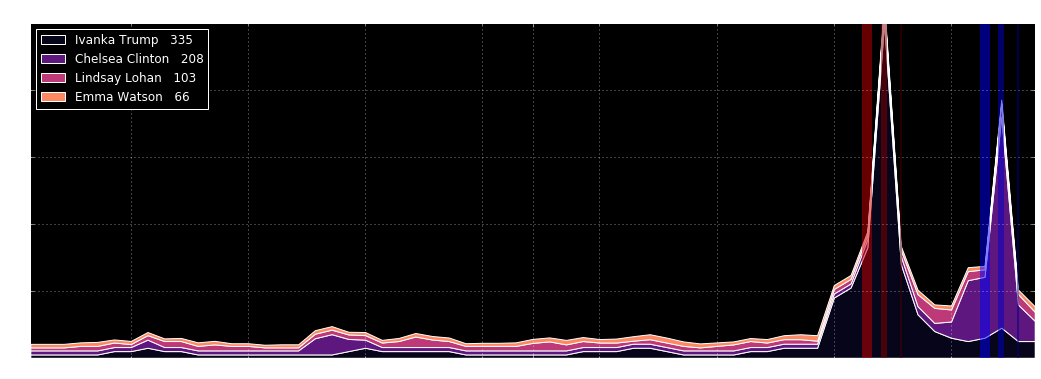

In [46]:
dg = df['2016-06-01':]
fig, ax = plt.subplots(1, 1, figsize = (18, 6))
yl = 100
uc = 60
ax.set_ylim((-0,yl))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
ax.grid(which = 'both')
ax.set_title('Google Trends', fontsize = 14)
labs = dg.columns.tolist()
labs = map(lambda lab: lab + '   {0:.0f}'.format(round(dg[lab].sum(),0)), labs)
ax.stackplot(dg.index, dg.iloc[:,0], dg.iloc[:,1], dg.iloc[:,2], dg.iloc[:,3], colors = plt.get_cmap('magma').colors[12:255:uc], labels = labs, baseline = 'zero')
plt.axvline(x=datetime.datetime(2016,7,21), linewidth=10, color='#CC0000', alpha=0.5)
plt.axvline(x=datetime.datetime(2016,7,22), linewidth=6, color='#880000', alpha=0.5)
plt.axvline(x=datetime.datetime(2016,7,23), linewidth=2, color='#440000', alpha=0.5)
plt.axvline(x=datetime.datetime(2016,7,28), linewidth=10, color='#0000FF', alpha=0.5)
plt.axvline(x=datetime.datetime(2016,7,29), linewidth=6, color='#0000CC', alpha=0.5)
plt.axvline(x=datetime.datetime(2016,7,30), linewidth=2, color='#000088', alpha=0.5)
plt.legend(loc = 'upper left')

In [33]:
dg.head()

,Ivanka Trump,Chelsea Clinton,Lindsay Lohan,Emma Watson
date,,,,
2016-06-01,1.0,1.212,0.898,1.056
2016-06-02,1.0,1.212,0.898,1.056
2016-06-03,1.0,1.212,0.898,1.056
2016-06-04,1.0,1.212,1.346,1.056
2016-06-05,1.0,1.212,1.346,1.188
